In [1]:
import sys, os
import numpy as np

In [2]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [3]:
import optimization_mantidReduction_variable_length_wall_thickness as opt
from sampleassembly_program import makeSAXML

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


In [ ]:
######### this is for creating only sampleassembly without collimator ######

In [ ]:
#making sample assembly note
sample_assembly_fileName = 'One_Cu_One_Si'

In [ ]:
scatterer = { ('outer-body_one_peak', 'shapeAl', 'outer-body-geom', 'Al', 'xyz'), 
    
              ('inner-sleeve_two_peaks', 'shapeCu', 'inner-sleeve-geom', 'Cu', 'cif'), 
    
             ('sample_two_peaks', 'shapeSample', 'sample_geom', 'Si', 'xyz')
             }
makeSAXML(sample_assembly_fileName, scatterer)

In [ ]:
cell=opt.PresureCell()
cell.parameters(Snap_angle=False, coll_sim=False,ncount=1e7,source_file='Neutrons_mcvine.dat', 
                sampleassembly_fileName=sample_assembly_fileName, sourceTosample_z=0.02)

In [ ]:
maximum_collimator_length=65
collimator_front_end_from_center=20
param=[maximum_collimator_length, collimator_front_end_from_center]
diffraction_pattern_Si = cell.diffraction_pattern_calculation (param )

In [ ]:
#### from here collimator simulation start #####

In [6]:
sample_assembly_fileName = 'collimator_plastic'
coll=opt.PresureCell()
coll.parameters(Snap_angle=True, coll_sim=True,ncount=1e7,source_file='two_Cu_one_Al_One_Si.mcvine', masking=True)

In [7]:
coll_length=[26.46, 50.68, 68.2, 74.46, 94.62, 97.23, 121.64, 135.5, 148.02, 152.13, 160]
wall_thickness= [1,2,3,4,5,]

('coll height at detector side: ', 67.05000000000001)
('coll width at detector side: ', 67.05000000000001)
('number channels in vertical direction: ', 14)
('number channels in horizontal direction: ', 14)


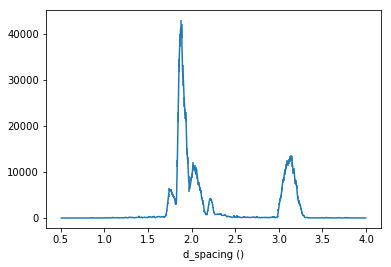

('coll_len,:', 26.46, 'channel_gap,:', 1, 'collimator_performance: ', 2.9415000080561917)
('coll height at detector side: ', 67.05000000000001)
('coll width at detector side: ', 67.05000000000001)
('number channels in vertical direction: ', 14)
('number channels in horizontal direction: ', 14)


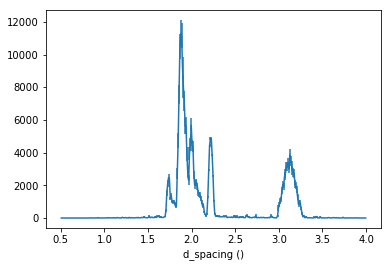

('coll_len,:', 26.46, 'channel_gap,:', 2, 'collimator_performance: ', 2.4957580770730026)
('coll height at detector side: ', 67.05000000000001)
('coll width at detector side: ', 67.05000000000001)
('number channels in vertical direction: ', 14)
('number channels in horizontal direction: ', 14)


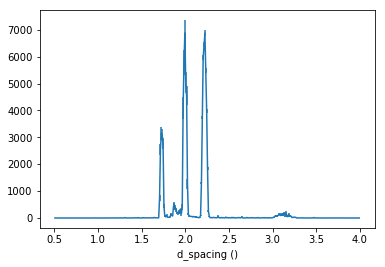

('coll_len,:', 26.46, 'channel_gap,:', 3, 'collimator_performance: ', 0.5187058900262351)
('coll height at detector side: ', 67.05000000000001)
('coll width at detector side: ', 67.05000000000001)
('number channels in vertical direction: ', 14)
('number channels in horizontal direction: ', 14)


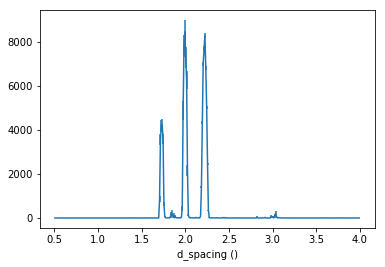

('coll_len,:', 26.46, 'channel_gap,:', 4, 'collimator_performance: ', 0.4140352646712644)
('coll height at detector side: ', 67.05000000000001)
('coll width at detector side: ', 67.05000000000001)
('number channels in vertical direction: ', 14)
('number channels in horizontal direction: ', 14)


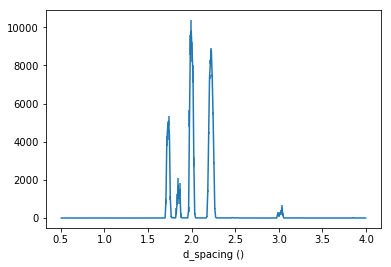

('coll_len,:', 26.46, 'channel_gap,:', 5, 'collimator_performance: ', 0.4371702865320708)
('coll height at detector side: ', 87.23333333333335)
('coll width at detector side: ', 87.23333333333335)
('number channels in vertical direction: ', 14)
('number channels in horizontal direction: ', 14)


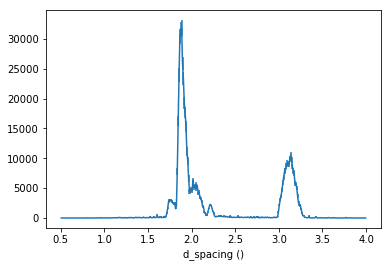

('coll_len,:', 50.68, 'channel_gap,:', 1, 'collimator_performance: ', 4.038552312386269)
('coll height at detector side: ', 87.23333333333335)
('coll width at detector side: ', 87.23333333333335)
('number channels in vertical direction: ', 14)
('number channels in horizontal direction: ', 14)


RuntimeError: mpirun -np 20 /home/fi0/anaconda2/envs/mcvine/bin/python /home/fi0/Collimator_3D/c3dp/out/length_50.68-dist_2/post-processing-scripts/save.py failed

In [8]:
for l in coll_length:
    for w in wall_thickness:
        coll.collimator_performance([l, w])

In [ ]:
coll_length=[50.68, 68.2, 74.46, 94.62, 97.23, 121.64, 135.5, 148.02, 152.13, 160]
wall_thickness= [2,3,4,5,]